In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.k

In [2]:
df = pd.read_excel('Rocket_Loans.xlsx')
df.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = df.drop(['Loan_ID'],axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          601 non-null    object 
 1   Age                          614 non-null    int64  
 2   Married                      611 non-null    object 
 3   No. of People in the Family  599 non-null    object 
 4   Qualification                614 non-null    object 
 5   Self_Employed                582 non-null    object 
 6   Loan_Bearer_Income           614 non-null    int64  
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             593 non-null    float64
 9   Loan_Tenure                  600 non-null    float64
 10  Credit_Score                 564 non-null    float64
 11  Location_type                614 non-null    object 
 12  Loan_Status                  614 non-null    object 
dtypes: float64(4), int64

a) Check for missing values in the dataset. Apply appropriate imputation
techniques if dataset has missing values.

In [5]:
mode = ['Sex','Married','No. of People in the Family','Qualification','Self_Employed','Loan_Tenure']
for i in mode:
    df[i] = df[i].fillna(df[i].mode()[0])

In [6]:
median = ['Amount Disbursed','Credit_Score']
for i in median:
    df[i] = df[i].fillna(df[i].median())
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          614 non-null    object 
 1   Age                          614 non-null    int64  
 2   Married                      614 non-null    object 
 3   No. of People in the Family  614 non-null    object 
 4   Qualification                614 non-null    object 
 5   Self_Employed                614 non-null    object 
 6   Loan_Bearer_Income           614 non-null    int64  
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             614 non-null    float64
 9   Loan_Tenure                  614 non-null    float64
 10  Credit_Score                 614 non-null    float64
 11  Location_type                614 non-null    object 
 12  Loan_Status                  614 non-null    object 
dtypes: float64(4), int64

In [8]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 c) Check for outliers in the dataset if any

In [9]:
col = []
for i in df.columns:
    if df[i].dtype != object:
        col.append(i)

In [10]:
for i in col:
    
    # finding values for Q1,Q2,Q3.
    Q1 = df[i].quantile(0.25)
    Q2 = df[i].quantile(0.5)
    Q3 = df[i].quantile(0.75)
    
    # finding inter quartile range
    IQR = Q3 - Q1
    
    lw = Q1 - (1.5 * IQR)
    uw = Q3 + (1.5 * IQR)
    
    outlier = df.loc[(df[i]<lw)|(df[i]>uw)]
    outlier_density = len(outlier)/len(df)
    
    if len(outlier) == 0:
            print('\nFeature ',i,' dose not have any outliers')
            
    else:
            print('\nFeature ',i,' has outliers')
            print('Total No of outliers in ',i,'are',len(outlier))
            print('Outlier % in ',i,'is',outlier_density)
            display(df.loc[(df[i] < lw) | (df[i] > uw)])
            
            
   


Feature  Age  dose not have any outliers

Feature  Loan_Bearer_Income  has outliers
Total No of outliers in  Loan_Bearer_Income are 50
Outlier % in  Loan_Bearer_Income is 0.08143322475570032


,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
9,Male,31,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,Male,29,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,32,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Male,36,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,Male,33,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
106,Male,44,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,Male,30,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,Female,49,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,Male,49,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,Male,41,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N



Feature  Loan_Cobearer_Income  has outliers
Total No of outliers in  Loan_Cobearer_Income are 18
Outlier % in  Loan_Cobearer_Income is 0.029315960912052116


,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
9,Male,31,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,Male,42,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,Male,35,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,Female,28,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,Male,32,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,Male,45,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,Male,33,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,Male,39,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,Male,33,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,Male,26,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y



Feature  Amount Disbursed  has outliers
Total No of outliers in  Amount Disbursed are 41
Outlier % in  Amount Disbursed is 0.06677524429967427


,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
5,Male,37,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
9,Male,31,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,Male,27,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,Male,29,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,32,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Male,36,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
83,Male,28,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
126,Male,49,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,Male,52,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y
135,Male,32,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N



Feature  Loan_Tenure  has outliers
Total No of outliers in  Loan_Tenure are 88
Outlier % in  Loan_Tenure is 0.14332247557003258


,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
14,Male,36,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
16,Male,47,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y
62,Male,44,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
66,Male,39,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
68,Male,29,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Male,25,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
593,Male,52,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
600,Female,52,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N
605,Male,39,Yes,0,Not Graduate,No,2400,3800.0,128.0,180.0,1.0,Urban,N



Feature  Credit_Score  has outliers
Total No of outliers in  Credit_Score are 89
Outlier % in  Credit_Score is 0.1449511400651466


,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
7,Male,39,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,Female,38,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,Male,43,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,Male,48,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,Male,45,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Male,44,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,Male,27,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,Male,45,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,Male,43,No,0,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [11]:
#  # Replacing outliers with Median 
# for i in col:
#     df.loc[(df[i] < lw),i] = df[i].mean()
#     df.loc[(df[i] > uw),i] = df[i].mean()

3. Give frequency distribution of total income for each group below.
(i.e. Total Income = Loan_bearer_income + Loan_Cobearer_income)
 - Below 5k
 - 5k to 10k
 - 10k to 15k
 - Above 15k

In [12]:
df.insert(8,'total_income',df['Loan_Bearer_Income'] + df['Loan_Cobearer_Income'],True)



In [13]:
df.insert(9,'income_group', df['total_income'].apply(lambda x: 'Below 5k' if x < 5000 
                                                     else ('5k to 10k' if x < 10000 and x >= 5000
                                                           else ('10k to 15k' if x < 15000 and x >= 10000
                                                                 else 'Above 15k'))))



In [14]:
df['income_group'].value_counts()

Below 5k      267
5k to 10k     258
10k to 15k     52
Above 15k      37
Name: income_group, dtype: int64

<AxesSubplot:>

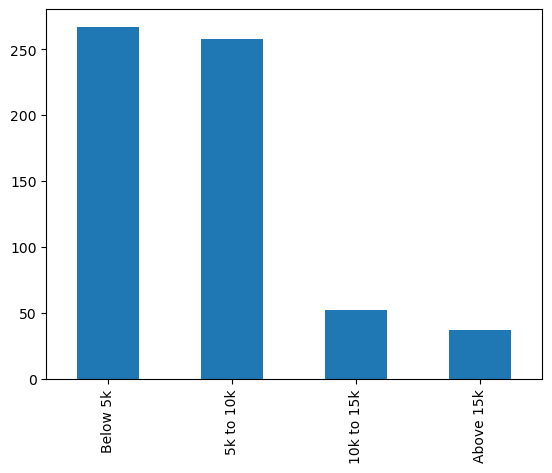

In [15]:
df['income_group'].value_counts().plot(kind='bar')

2. Find loan approval rate for applicants having credit score (i.e. 1)

In [16]:
creadit_score_1 = df.loc[df['Credit_Score'] == 1]
approval_rate = len(creadit_score_1.loc[df['Loan_Status'] == 'Y']) / (len(creadit_score_1.loc[df['Loan_Status'] == 'Y']) + len(creadit_score_1.loc[df['Loan_Status'] == 'N']))
print('loan approval rate for applicants having credit score :', approval_rate)

loan approval rate for applicants having credit score : 0.7904761904761904


b) Convert nominal features into factors with numerical value mapped to each
value.

In [17]:
df['No. of People in the Family'] = df['No. of People in the Family'].replace('3+','3')
df['No. of People in the Family'] = df['No. of People in the Family'].astype(int)

In [18]:
encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])

In [19]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,total_income,income_group,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849,0.0,5849.0,1,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583,1508.0,6091.0,1,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000,0.0,3000.0,3,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583,2358.0,4941.0,3,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000,0.0,6000.0,1,141.0,360.0,1.0,2,1


Which independent variable have high correlation with dependent variable?
(Correlation Plot/Matrix is preferrable)

<AxesSubplot:>

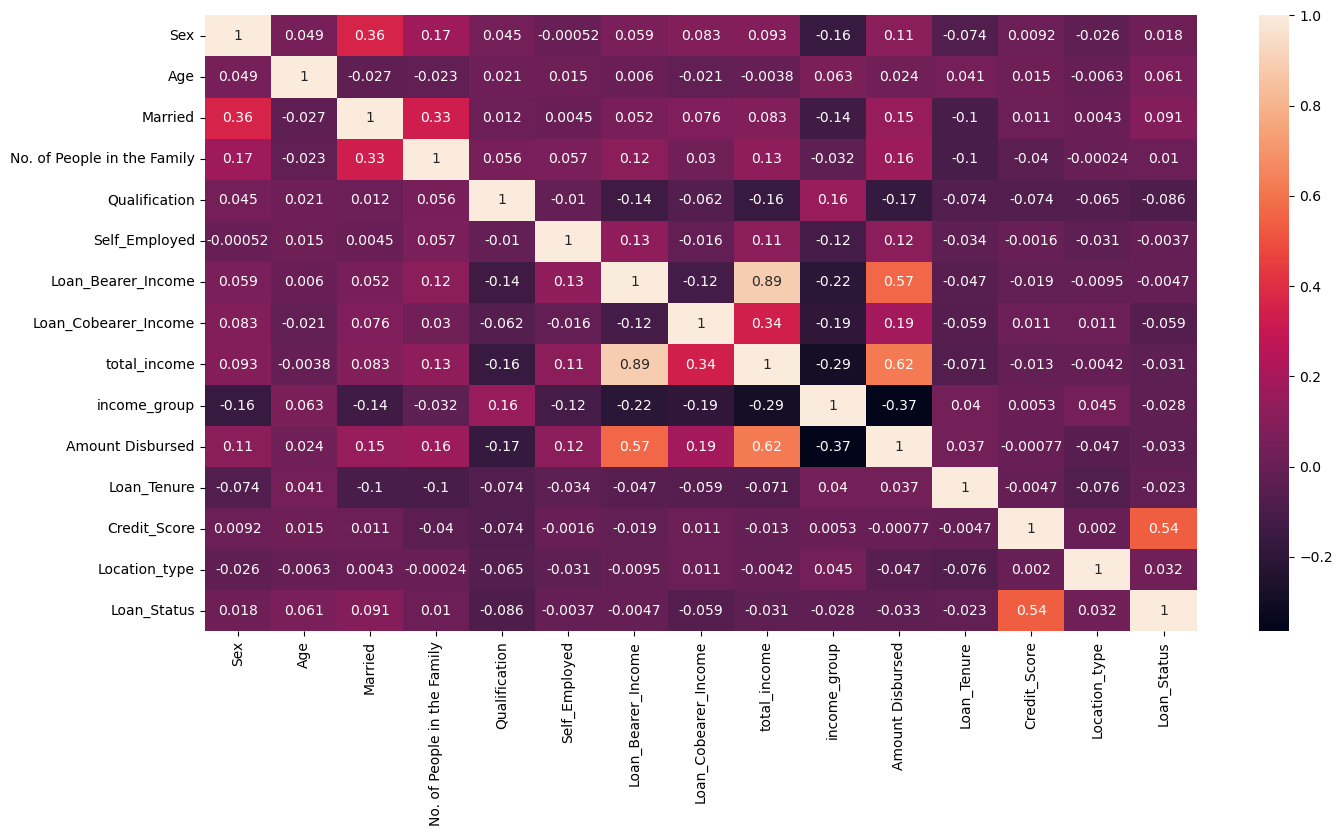

In [20]:
corr = df.corr()
f,ax = plt.subplots(figsize =(16,8))
sns.heatmap(corr,annot = True)

5. Model the data using any classification algorithm and explain the evaluation
metrics used. (Split the dataset into train (80%) and test (20%))

In [21]:
df = df.drop(['Loan_Bearer_Income','Loan_Cobearer_Income'],axis=1)

In [22]:
x = df.drop(['Loan_Status'],axis=1)
y = df[['Loan_Status']]


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [30]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8536585365853658